In [26]:
# importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle



In [4]:
# read the input csv file and convert into a pandas dataframe
df = pd.read_csv('C:/Users/spand/DataScienceTransition/churn-prediction/Churn_Prediction_Code/data/raw/Customer_Churn.csv')

df.head()  # display the sample records

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
print(df.shape)
print(df.info())  # check the complete details of the dataframe


(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [6]:
print(df.describe())  # check the five point summary of the data

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [9]:
# check for null and duplicate values
print(df.duplicated().sum())

print(df.isnull().sum())

0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# from the dataset the datatype of the total charges is object type instead of numeric.
#convert the datatype to numeric and handle the missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
# remove the unwanted columns -- customerID
df.drop(columns=['customerID'], axis = 1, inplace = True)
print(df.shape)


(7043, 20)


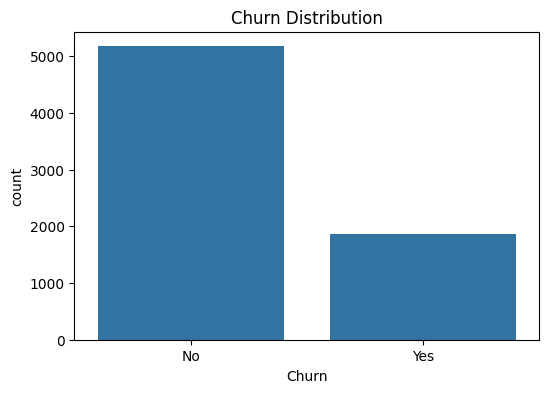

In [12]:
#visual analysis of categorical variables

#target variable
plt.figure(figsize=(6,4))
sns.countplot(x = 'Churn' , data = df)
plt.title('Churn Distribution')
plt.show()

Dataset is imbalanced. ~26–30% customers churn.

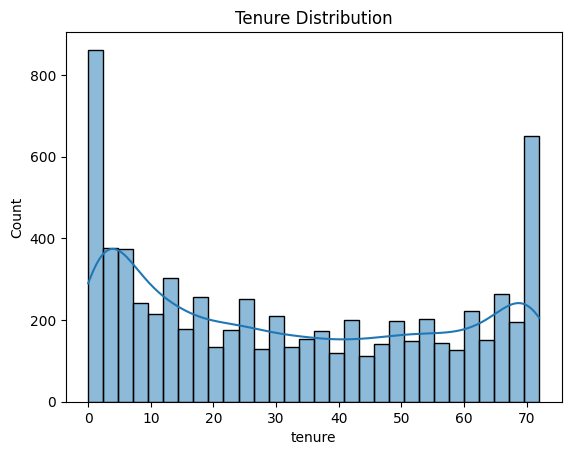

In [13]:
#numerical data analysis for Tenure

plt.Figure(figsize = (15,6))
sns.histplot(df['tenure'],bins=30,kde = True)
plt.title('Tenure Distribution')
plt.show()

most of the customers are new. shorter tenure customers are likely to churn more.

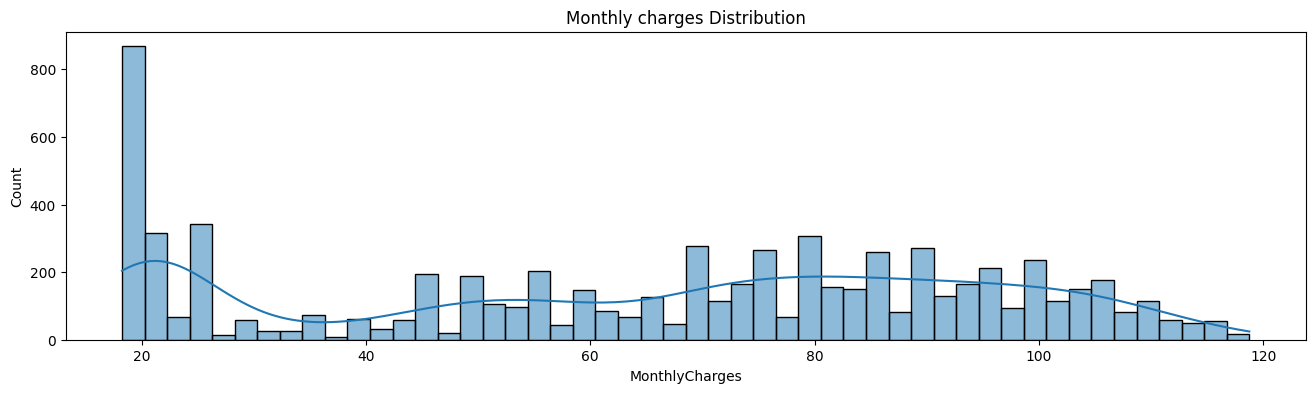

In [14]:
#monthly charges distribution

plt.figure(figsize = (16,4))
sns.histplot(df['MonthlyCharges'],bins = 50 ,kde = True)
plt.title('Monthly charges Distribution')
plt.show()

Higher charges correlate with churn
Pricing sensitivity exists

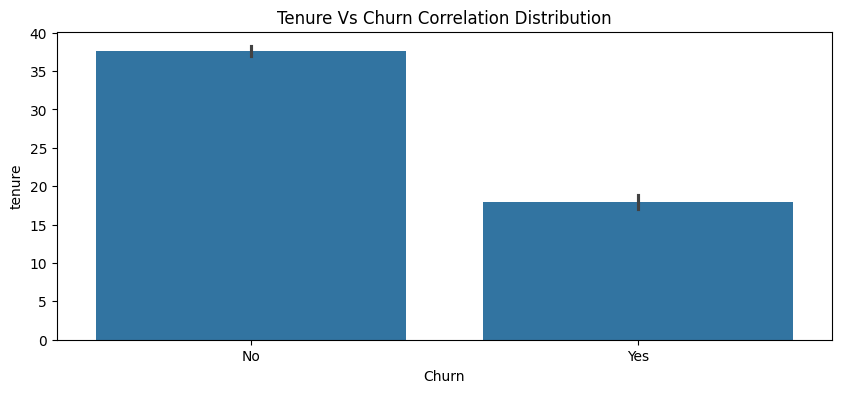

In [15]:
#Bivariate analysis

# Tenure Vs Churn

plt.figure(figsize=(10,4))
sns.barplot(x = 'Churn',y = 'tenure',data = df)
plt.title('Tenure Vs Churn Correlation Distribution')
plt.show()

customers within the lower tenure range are likely to churn more

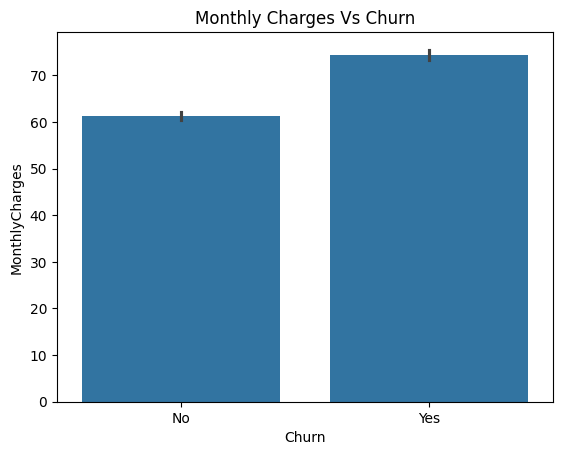

In [16]:
#Monthly Charges Vs Churn

plt.Figure(figsize=(6,4))
sns.barplot(x = 'Churn', y ='MonthlyCharges', data =  df)
plt.title('Monthly Charges Vs Churn')
plt.show()

customers churned paid more monthly charges

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# analysing the categorical columns against target variable
cols = ["MultipleLines","InternetService","Contract","PaperlessBilling","PaymentMethod",'TechSupport','OnlineSecurity','gender']
df['churn_flag']= df['Churn'].map({'Yes':1 , 'No':0})

for col in cols:
    plt.figure(figsize=(6,4))
    churn_rate = df.groupby(col)['churn_flag'].mean().reset_index()
    sns.barplot(x = col, y = 'churn_flag', data = churn_rate , alpha = 0.5 )
    plt.title(f"Distribution of {col} Vs Churn")
    plt.xlabel(f" churn rate by  {col}")
    plt.ylabel("Churn rate")
    if col == 'PaymentMethod':
      plt.xticks(rotation = 30)
    plt.show() 
   

MultipleLines Vs Churn:
This variable has a minimal impact on churn as the difference between them is less

Internet Service Vs Churn:
Fiber optic customers show higher churn
Indicates pricing or service-quality concerns

Contracts Vs Churn:
Month-to-month customers have the highest churn rate
Long-term contracts significantly reduce churn risk

Paperless Billing Vs Churn:
Customers with paperless billing has highest churn rate
while with paper billing has less risk.

Payment Method Vs Churn:
Electronic check users churn more
Auto-payment methods increase retention


Tech Support vs Churn:
Customers without tech support churn significantly more
Upselling tech support may reduce churn

Online Security Vs Churn:
Security add-ons correlate with lower churn
Value-added services improve retention

Gender Vs Churn:
No significant difference
Gender is likely not a strong predictor

In [28]:
# converting the categorical variables into numeric using labelencoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [43]:
# split the dataset into X and Y train and test variables

X =  df.drop('Churn',axis = 1)
y = df['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7 , random_state = 42,stratify=y)

In [30]:
#scaling the columns 
scaler = StandardScaler()

cols = ["tenure","MonthlyCharges","TotalCharges"]

X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols]  = scaler.fit_transform(X_test[cols])

In [44]:
#handling the imbalance in the dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(
    sampling_strategy='auto',
    random_state=42
)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [45]:
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())


Before SMOTE:
Churn
0    1552
1     560
Name: count, dtype: int64

After SMOTE:
Churn
0    1552
1    1552
Name: count, dtype: int64


In [46]:
#designing the model starting with Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

model_lr = LogisticRegression(max_iter=2500)
model_lr.fit(X_train_smote,y_train_smote)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [47]:
y_pred = model_lr.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy Of Model : {accuracy}")
conf_matrix = confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix : {conf_matrix}')
train_score = model_lr.score(X_train,y_train)
print(f"Train Score : {train_score}")
test_score = model_lr.score(X_test,y_test)
print(f"Test Score : {test_score}")
report =classification_report(y_test,y_pred)
print(f"Report :\n {report}")

Accuracy Of Model : 1.0
Confusion Matrix : [[3622    0]
 [   0 1309]]
Train Score : 1.0
Test Score : 1.0
Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      1.00      1.00      1309

    accuracy                           1.00      4931
   macro avg       1.00      1.00      1.00      4931
weighted avg       1.00      1.00      1.00      4931



As per the scores obtained, are uncertain resulting in 100% for all the metrics, we are going to build another model with different algorithm.

In [48]:
#SVM model

from sklearn.svm import SVC

model_svm = SVC(kernel= 'rbf',C= 0.01)
model_svm.fit(X_train_smote,y_train_smote)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",0.01
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [49]:
y_pred1 = model_svm.predict(X_test)

accuracy = accuracy_score(y_test,y_pred1)
print(f"Accuracy Of Model : {accuracy}")
con_matrix = confusion_matrix(y_test,y_pred1)
print(f"confusion matrix :\n {con_matrix}")
train_score = model_svm.score(X_train,y_train)
print(f"Train Score : {train_score}")
test_score = model_svm.score(X_test,y_test)
print(f"Test Score : {test_score}")
report =classification_report(y_test,y_pred1)
print(f"Report :\n {report}")

Accuracy Of Model : 0.53092678969783
confusion matrix :
 [[1701 1921]
 [ 392  917]]
Train Score : 0.5236742424242424
Test Score : 0.53092678969783
Report :
               precision    recall  f1-score   support

           0       0.81      0.47      0.60      3622
           1       0.32      0.70      0.44      1309

    accuracy                           0.53      4931
   macro avg       0.57      0.59      0.52      4931
weighted avg       0.68      0.53      0.55      4931



SVM model gives better score compared to logistic regression model.

In [39]:
#designing the model

model_rfc = RandomForestClassifier(n_estimators = 300
, max_depth = 10
, random_state = 42)

print(model_rfc)


RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)


In [50]:
#training the model
model_rfc.fit(X_train_smote,y_train_smote)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [51]:
y_pred2 = model_rfc.predict(X_test)  # prediction

accuracy = accuracy_score(y_test,y_pred2)
print(f"Accuracy Of Model : {accuracy}")
con_matrix = confusion_matrix(y_test,y_pred2)
print(f"confusion matrix :\n {con_matrix}")
train_score = model_rfc.score(X_train,y_train)
print(f"Train Score : {train_score}")
test_score = model_rfc.score(X_test,y_test)
print(f"Test Score : {test_score}")
report =classification_report(y_test,y_pred2)
print(f"Report :\n {report}")

Accuracy Of Model : 1.0
confusion matrix :
 [[3622    0]
 [   0 1309]]
Train Score : 1.0
Test Score : 1.0
Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      1.00      1.00      1309

    accuracy                           1.00      4931
   macro avg       1.00      1.00      1.00      4931
weighted avg       1.00      1.00      1.00      4931



From the created models, we have the better accuracy and better scores for the model created using Random Forest Algorithm. To check for another possibility will create another model using XGBoost

In [52]:
#building model using XGBoost algorithm

from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    n_estimators = 200,
    max_depth = 5,
    learning_rate = 0.1,
    subsample = 0.8,
    random_state = 42,
    eval_metric = 'logloss'
)

model_xgb.fit(X_train_smote,y_train_smote)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [53]:
y_pred3 = model_xgb.predict(X_test)

accuracy = accuracy_score(y_test,y_pred3)
print(f"Accuracy Of Model : {accuracy}")
con_matrix = confusion_matrix(y_test,y_pred3)
print(f"confusion matrix :\n {con_matrix}")
train_score = model_xgb.score(X_train,y_train)
print(f"Train Score : {train_score}")
test_score = model_xgb.score(X_test,y_test)
print(f"Test Score : {test_score}")
report =classification_report(y_test,y_pred3)
print(f"Report :\n {report}")

Accuracy Of Model : 1.0
confusion matrix :
 [[3622    0]
 [   0 1309]]
Train Score : 1.0
Test Score : 1.0
Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      1.00      1.00      1309

    accuracy                           1.00      4931
   macro avg       1.00      1.00      1.00      4931
weighted avg       1.00      1.00      1.00      4931

